# Package loading and basic configurations

In [2]:
pip install envirocar-py --upgrade

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 5.3 MB 164 kB/s eta 0:00:01
     |████████████████████████████████| 93 kB 74 kB/s  eta 0:00:01


  Created wheel for envirocar-py: filename=envirocar_py-0.0.2-py3-none-any.whl size=7411 sha256=1e57322d4de162449eada077b7055c099027eccc3e1002e6c9bdc71e972942dc
  Stored in directory: /home/poshan/.cache/pip/wheels/d4/8e/f8/3a710aa96254cc13b2f73a7ed81b029881374010fff088826a
Successfully built envirocar-py
Note: you may need to restart the kernel to use updated packages.


In [1]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd

from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

# Querying enviroCar Tracks

The following cell queries tracks from the enviroCar API. It defines a bbox for the area of Muenster (Germany) and requests 50 tracks. The result is a GeoDataFrame, which is a geo-extended Pandas dataframe from the GeoPandas library. It contains all information of the track in a flat dataframe format including a specific geometry column. 

In [3]:
bbox = BboxSelector([
    7.393798828125, # min_x
    51.46812470399791, # min_y
    7.5421142578125, # max_x
    51.54548101558932  # max_y
])
#requested data for some part of Muenster

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=50) # requesting 50 tracks inside the bbox
track_df

,id,time,geometry,Intake Temperature.value,Intake Temperature.unit,Speed.value,Speed.unit,GPS Accuracy.value,GPS Accuracy.unit,O2 Lambda Voltage ER.value,...,sensor.constructionYear,sensor.manufacturer,O2 Lambda Current ER.value,O2 Lambda Current ER.unit,O2 Lambda Current.value,O2 Lambda Current.unit,Consumption.value,Consumption.unit,CO2.value,CO2.unit
0,5e3de5453965f36894baef60,2020-02-07T21:37:55,POINT (7.68222 51.54408),9.0,c,0.000000,km/h,9.648001,%,0.0,...,2012,Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5e3de5453965f36894baef62,2020-02-07T21:38:00,POINT (7.68222 51.54408),9.0,c,2.455542,km/h,10.171660,%,0.0,...,2012,Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5e3de5453965f36894baef63,2020-02-07T21:38:05,POINT (7.68228 51.54398),9.0,c,18.432762,km/h,9.648001,%,0.0,...,2012,Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5e3de5453965f36894baef64,2020-02-07T21:38:10,POINT (7.68192 51.54384),9.0,c,34.939904,km/h,12.864000,%,0.0,...,2012,Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5e3de5453965f36894baef65,2020-02-07T21:38:15,POINT (7.68107 51.54382),9.0,c,37.999999,km/h,9.981393,%,0.0,...,2012,Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,53f8eeeee4b04c314e7cf659,2014-08-23T15:07:14,POINT (7.43899 51.49010),NaN,NaN,15.000000,km/h,10.000000,%,NaN,...,2013,Suzuki,NaN,NaN,NaN,NaN,0.874401,l/h,2.054842,kg/h
463,53f8eeeee4b04c314e7cf65b,2014-08-23T15:07:19,POINT (7.43936 51.48996),NaN,NaN,23.000000,km/h,10.000000,%,NaN,...,2013,Suzuki,NaN,NaN,NaN,NaN,1.058485,l/h,2.487440,kg/h
464,53f8eeeee4b04c314e7cf65d,2014-08-23T15:07:25,POINT (7.43983 51.48978),NaN,NaN,19.000000,km/h,3.000000,%,NaN,...,2013,Suzuki,NaN,NaN,NaN,NaN,1.679770,l/h,3.947459,kg/h
465,53f8eeeee4b04c314e7cf65f,2014-08-23T15:07:31,POINT (7.43993 51.48963),NaN,NaN,0.000000,km/h,4.000000,%,NaN,...,2013,Suzuki,NaN,NaN,NaN,NaN,0.700178,l/h,1.645419,kg/h


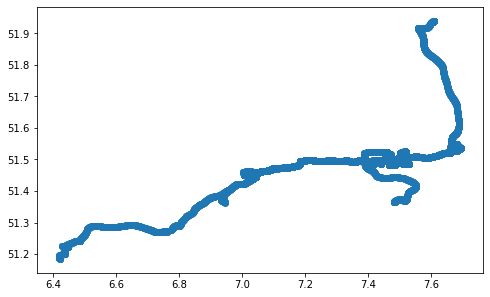

In [4]:
track_df.plot(figsize=(8, 10))

# Inspecting a single Track

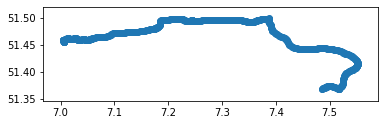

In [6]:
some_track_id = track_df['track.id'].unique()[11] #finding one id checking for 11th track
some_track = track_df[track_df['track.id'] == some_track_id] #finding the track
some_track.plot()

#### Available attributes in the data

In [7]:
track_df.dtypes

id                              object
time                            object
geometry                      geometry
Intake Temperature.value       float64
Intake Temperature.unit         object
Speed.value                    float64
Speed.unit                      object
GPS Accuracy.value             float64
GPS Accuracy.unit               object
O2 Lambda Voltage ER.value     float64
O2 Lambda Voltage ER.unit       object
Engine Load.value              float64
Engine Load.unit                object
O2 Lambda Voltage.value        float64
O2 Lambda Voltage.unit          object
Intake Pressure.value          float64
Intake Pressure.unit            object
MAF.value                      float64
MAF.unit                        object
GPS Altitude.value             float64
GPS Altitude.unit               object
Rpm.value                      float64
Rpm.unit                        object
Throttle Position.value        float64
Throttle Position.unit          object
GPS Speed.value          

#### Length of the track

In [8]:
some_track["track.length"].sum()

31111.37801330711

#### Number of Segments

In [9]:
len(some_track)

558

#### Plotting some attributes (Intake Temperature and Elevation) of the Segments

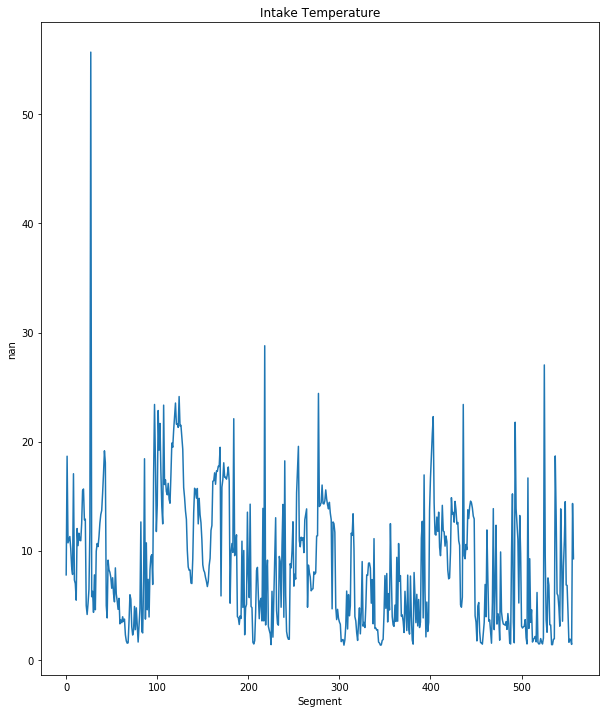

In [10]:
ax = some_track['CO2.value'].plot(figsize= (10,12))
ax.set_title("Intake Temperature")
ax.set_ylabel(some_track['Intake Temperature.unit'][0])
ax.set_xlabel("Segment")
ax

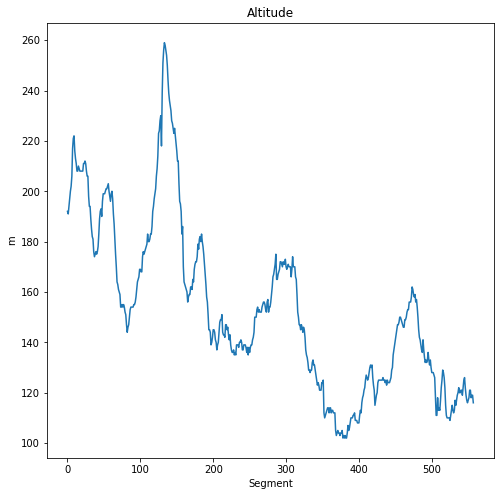

In [11]:
ax = some_track['GPS Altitude.value'].plot(figsize= (8,8) )
ax.set_title("Altitude")
ax.set_ylabel(some_track['GPS Altitude.unit'][0])
ax.set_xlabel("Segment")
ax

#### General Statistics of GPS Altitude 

In [12]:
track_df["GPS Altitude.value"].describe()

count    11538.000000
mean       143.001786
std         25.375782
min         68.000000
25%        125.999998
50%        145.999999
75%        158.835126
max        266.000000
Name: GPS Altitude.value, dtype: float64

## using seaborn for further visualization 

In [13]:
import seaborn as sbn

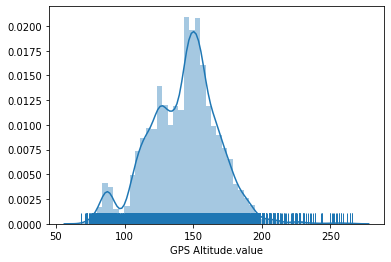

In [14]:
sbn.distplot(track_df["GPS Altitude.value"], hist=True, rug=True)

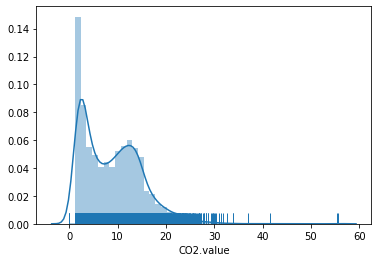

In [15]:
sbn.distplot(track_df["CO2.value"], hist=True, rug=True)

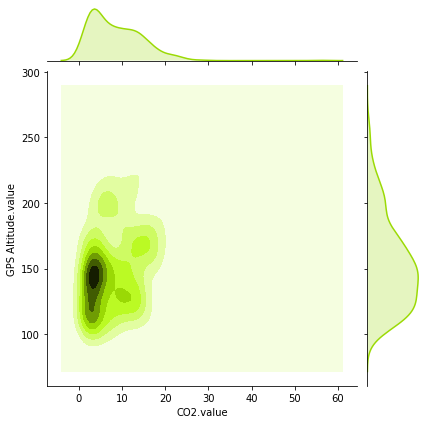

In [16]:
sbn.jointplot(y = "GPS Altitude.value", x = "CO2.value", data=some_track, kind="kde", color = "#9bda05")

#### Altitude and Co2 Emission doesnot look correlated with the visual methods 

## Interactive Map
The following map-based visualization makes use of folium. It allows to visualizate geospatial data based on an interactive leaflet map. Since the data in the GeoDataframe is modelled as a set of Point instead of a LineString, we have to manually create a polyline

In [17]:
import folium

# print(some_track["geometry"]) #= coord 

# print(list(some_track["geometry"].y)) #coord.y

# list(some_track["geometry"].y)

# print(some_track["geometry"].apply(lambda coord: coord.y))

lats = list(some_track['geometry'].apply(lambda coord: coord.y))
# print(lats)
lngs = list(some_track['geometry'].apply(lambda coord: coord.x))

avg_lat = sum(lats) / len(lats)
avg_lngs = sum(lngs) / len(lngs)

m = folium.Map(location=[avg_lat - 0.25, avg_lngs], tiles = 'Stamen Terrain', zoom_start=9)
folium.PolyLine([coords for coords in zip(lats, lngs)], color='#e90b64').add_to(m)
m

# Example: Visualization with pydeck (deck.gl)

The pydeck library makes use of the basemap tiles from Mapbox. In case you want to visualize the map with basemap tiles, you need to register with MapBox, and configure a specific access token. The service is free until a certain level of traffic is esceeded.

You can either configure it via your terminal (i.e. `export MAPBOX_API_KEY=<mapbox-key-here>`), which pydeck will automatically read, or you can pass it as a variable to the generation of pydeck (i.e. `pdk.Deck(mapbox_key=<mapbox-key-here>, ...)`.

In [18]:
import pydeck as pdk

# for pydeck the attributes have to be flat
track_df['lat'] = track_df['geometry'].apply(lambda coord: coord.y)
track_df['lng'] = track_df['geometry'].apply(lambda coord: coord.x)
vis_df = pd.DataFrame(track_df)
vis_df['speed'] = vis_df['Speed.value']

# omit unit columns
vis_df_cols = [col for col in vis_df.columns if col.lower()[len(col)-4:len(col)] != 'unit']
vis_df = vis_df[vis_df_cols]

layer = pdk.Layer(
    'ScatterplotLayer',
    data=vis_df,
    get_position='[lng, lat]',
    auto_highlight=True,
    get_radius=50,          # Radius is given in meters
    get_fill_color='[speed < 20 ? 0 : (speed - 20)*8.5, speed < 50 ? 255 : 255 - (speed-50)*8.5, 0, 255]',  # Set an RGBA value for fill
    pickable=True
)

# Set the viewport location  
view_state = pdk.ViewState(
    longitude=7.286479164659496,
    latitude= 51.46036075627242,
    zoom=9,
    min_zoom=5,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)

r = pdk.Deck(
    width=200, 
    layers=[layer], 
    initial_view_state=view_state, 
    mapbox_key="pk.eyJ1IjoicG9zaGFuIiwiYSI6InZ5a0dsLVkifQ.DGY81ha1q5VQpj3QA-REew"
)
r.to_html('tracks_muenster.html', iframe_width=900)

'/home/poshan/Desktop/FloatingCar/envirocar-py/examples/tracks_muenster.html'

# Getis Ord

In [1]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
from datetime import datetime
import pysal
pd.options.mode.chained_assignment = None 

from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

/opt/anaconda/lib/python3.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


In [65]:
## Köln bbox coordinates
bbox = BboxSelector([
    6.756591796875, # min_x
    50.84583876895451, # min_y
    7.130126953125, # max_x
    51.06729071974382  # max_y
])
# bbox = BboxSelector([
#     6.70989990234375, # min_x
#     51.061249423389796, # min_y
#     7.145233154296875, # max_x
#     50.848440021829276  # max_y
# ])

# #mUenster
# bbox = BboxSelector([
#     7.393798828125, # min_x
#     51.46812470399791, # min_y
#     7.5421142578125, # max_x
#     51.54548101558932  # max_y
# ])

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=50) # requesting 50 tracks inside the bbox
track_df.head()




48276

In [66]:
len(track_df)

48276

In [3]:
track_df.crs

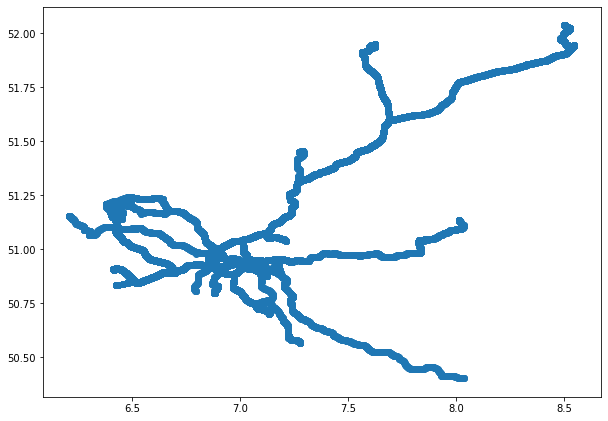

In [6]:
track_df.plot(figsize=(10, 12))

# Inspecting a single Track

In [5]:
pip install pyproj

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
!pip install -U pyproj psutil

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.9 MB 5.6 MB/s eta 0:00:01
     |████████████████████████████████| 449 kB 6.4 MB/s eta 0:00:01
  Created wheel for psutil: filename=psutil-5.7.0-cp37-cp37m-linux_x86_64.whl size=264337 sha256=b46302acdebae42229ff3dbe073aacc988fa5174d82b007e07dd5df3a7639328
  Stored in directory: /home/poshan/.cache/pip/wheels/b6/e7/50/aee9cc966163d74430f13f208171dee22f11efa4a4a826661c
Successfully built psutil
ERROR: spyder 4.0.1 requires pyqt5<5.13; python_version >= "3", which is not installed.
ERROR: spyder 4.0.1 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.
ERROR: pytest-astropy 0.8.0 requires pytest-cov>=2.0, which is not installed.
ERROR: pytest-astropy 0.8.0 requires pytest-filter-subpackage>=0.1, which is not installed.


In [68]:
from pysal import esda
import numpy as np

from pyproj import CRS
from pyproj import Transformer

inputCRS = CRS.from_epsg(4326)
outputCRS = CRS.from_epsg(25832)
transformer = Transformer.from_crs(inputCRS, outputCRS)
def project(a,b):
    return transformer.transform(a, b)


## select stopping times data
df_speed = track_df[track_df['Speed.value'] == 0]

##group by geometry
## as the data is 5 sec if there are repeated lat,lng means the stop is +5 sec
df_speed['lat'] = df_speed['geometry'].apply(lambda coord: coord.y)
df_speed['lng'] = df_speed['geometry'].apply(lambda coord: coord.x)
df_speed['time_sec'] = 5
df_speed.reset_index()


data_speed = df_speed.groupby(['lat','lng'])[['time_sec']].sum().reset_index()
print(data_speed.head())
#change this directory 
data_speed.to_csv('/home/poshan/Desktop/MSc/FloatingCar/envirocar-py/examples/data.csv')


         lat       lng  time_sec
0  50.565778  7.277756         5
1  50.565802  7.277791         5
2  50.565802  7.277791         5
3  50.565802  7.277750        25
4  50.565802  7.277750         5


In [69]:
data_speed['time_sec'].describe()

count    858.000000
mean       8.554779
std       16.701719
min        5.000000
25%        5.000000
50%        5.000000
75%        5.000000
max      265.000000
Name: time_sec, dtype: float64

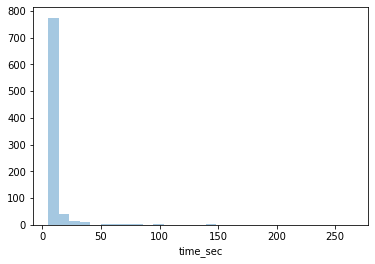

In [78]:
sns.distplot(data_speed['time_sec'], kde=False)

In [8]:
### calculate weights for getis ord
coords = [project(row['lat'], row['lng']) for index, row in data_speed.iterrows()]
w = pysal.weights.DistanceBand(coords, threshold= 50)
# w
coords

/opt/anaconda/lib/python3.7/site-packages/pysal/weights/weights.py:189: UserWarning: There are 40 disconnected observations
  warnings.warn("There are %d disconnected observations" % ni)
/opt/anaconda/lib/python3.7/site-packages/pysal/weights/weights.py:190: UserWarning: Island ids: 69, 72, 73, 74, 75, 78, 81, 82, 83, 84, 85, 86, 110, 111, 112, 170, 171, 180, 196, 197, 402, 417, 431, 457, 615, 655, 656, 659, 665, 666, 669, 682, 726, 793, 798, 836, 841, 855, 856, 857
  warnings.warn("Island ids: %s" % ', '.join(str(island) for island in self.islands))


[(378029.8598006343, 5602955.598139494),
 (378032.3971381654, 5602958.189624415),
 (378032.39713816554, 5602958.189624415),
 (378029.5278035706, 5602958.298209767),
 (378029.5278035706, 5602958.298209768),
 (378032.40676355024, 5602958.273223366),
 (378032.4067635503, 5602958.273223366),
 (378029.537428958, 5602958.381808712),
 (378032.4163889348, 5602958.356822316),
 (378032.4163889348, 5602958.3568223175),
 (378032.4163889348, 5602958.3568223175),
 (378032.4163889347, 5602958.3568223175),
 (378029.5470543452, 5602958.465407657),
 (378032.4260143192, 5602958.440421267),
 (378032.4356397031, 5602958.524020218),
 (378032.4356397032, 5602958.524020218),
 (377969.3656561485, 5603115.924847862),
 (377966.63760006195, 5603116.717769147),
 (377970.1375177922, 5603117.3741213605),
 (377970.3335993565, 5603117.957339438),
 (377969.3525794752, 5603118.782256865),
 (377955.5712661898, 5603167.819705553),
 (377955.6097673529, 5603168.154113443),
 (374174.0248037651, 5606094.247127983),
 (374174.0

In [9]:
#getisOrdGlobal = esda.getisord.G(data_speed['time_sec'], w)
getisOrdLocal = esda.getisord.G_Local(data_speed['time_sec'], w, transform='B')

/opt/anaconda/lib/python3.7/site-packages/pysal/esda/getisord.py:434: RuntimeWarning: invalid value encountered in true_divide
  self.Zs = (self.Gs - self.EGs) / np.sqrt(self.VGs)


In [10]:
getisOrdLocal.Zs

array([ 2.59008910e-01,  2.59008910e-01,  2.59008910e-01, -4.73165046e-02,
        2.59008910e-01,  2.59008910e-01,  2.59008910e-01,  1.05865387e-01,
        2.59008910e-01, -1.51987988e-01, -1.57110593e-01,  2.59008910e-01,
        2.59008910e-01,  1.82429915e-01,  1.82429915e-01,  2.59008910e-01,
       -4.26934951e-01, -4.26934951e-01, -4.26934951e-01, -4.26934951e-01,
       -4.26934951e-01, -2.13093080e-01, -2.13093080e-01, -3.01034337e-01,
       -8.97191116e-02, -8.97191116e-02, -1.41531161e+00, -1.41531161e+00,
       -1.41531161e+00, -1.41531161e+00, -1.41531161e+00, -1.41531161e+00,
       -1.41531161e+00, -1.41531161e+00, -1.41531161e+00, -1.41531161e+00,
       -1.41531161e+00, -1.41531161e+00, -1.41531161e+00, -1.41531161e+00,
       -1.41531161e+00, -1.41531161e+00, -1.41531161e+00, -1.41531161e+00,
       -1.41531161e+00, -1.41531161e+00, -1.41531161e+00, -1.41531161e+00,
       -1.41531161e+00, -1.41531161e+00, -1.41531161e+00, -1.41531161e+00,
       -1.41531161e+00, -

In [42]:
data_speed['z_score'] = getisOrdLocal.Zs
data_speed['p_value'] = getisOrdLocal.p_norm
# data_speed[data_speed['p_value'] < 0.05]
# data_speed[data_speed['z_score'] == 0]
# data_speed_hotspots = data_speed[data_speed['z_score'] > 0 and data_speed['p_value'] < 0.05]
# hotspots1 = data_speed[data_speed['p_value'] < 0.05]
#query
# hotspot = data_speed.query('z_score > 0 & p_value < 0.05')
#two conditions
hotspot = data_speed[(data_speed.z_score > 0) & (data_speed.p_value <=0.05)]
coldspot = data_speed[(data_speed.z_score < 0) & (data_speed.p_value <=0.05)]

hotspot


,lat,lng,time_sec,z_score,p_value
77,50.718685,7.118254,25,7.875772,1.665335e-15
79,50.719900,7.112676,40,1.888866,2.945492e-02
80,50.719964,7.112245,40,1.888866,2.945492e-02
87,50.726640,7.082341,55,2.242357,1.246916e-02
88,50.726732,7.082256,30,3.097380,9.761978e-04
89,50.726888,7.082131,40,2.281772,1.125140e-02
90,50.726937,7.082080,20,2.874825,2.021259e-03
102,50.727864,7.080958,40,1.714811,4.318999e-02
103,50.728270,7.080273,15,4.359674,6.512832e-06
104,50.728348,7.080116,85,3.490120,2.414022e-04


In [35]:
coldspot

,lat,lng,time_sec,z_score,p_value
242,50.898245,7.083072,5,-2.188305,0.014324
243,50.898246,7.083072,5,-2.188305,0.014324
244,50.898247,7.083073,5,-2.188305,0.014324
245,50.898248,7.083076,5,-2.188305,0.014324
246,50.898248,7.083076,5,-2.188305,0.014324
...,...,...,...,...,...
332,50.898251,7.083076,5,-2.188305,0.014324
333,50.898251,7.083073,5,-2.188305,0.014324
334,50.898252,7.083073,5,-2.188305,0.014324
335,50.898269,7.083067,5,-2.188305,0.014324


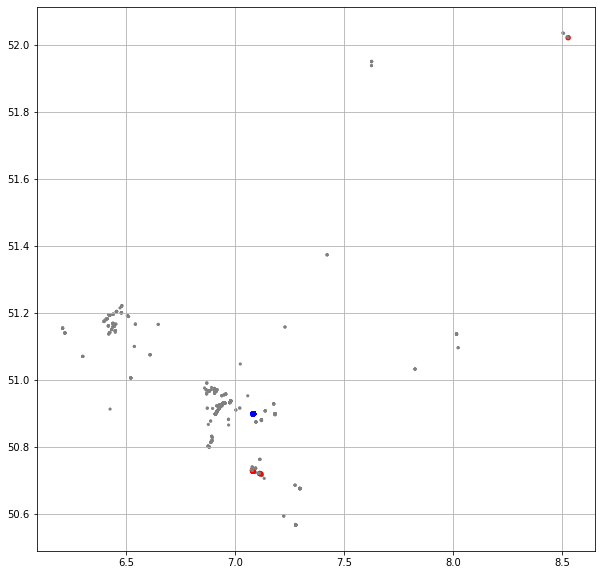

In [48]:
from matplotlib import pyplot as plt
#>1.96 hot spots
#<-1.96 cold spots
from matplotlib import colors as cls

f, axarr = plt.subplots(1, figsize=(10,10))
total_range = cls.Normalize(vmin = - 1.96, vmax = 1.96)

def pltcolor(p_value, z_score, confidence):
    cols=[]
    size=[]
    for p, z in zip(p_value, z_score):
        if p < confidence:
            if z > 0:
                cols.append('red')
                size.append(30)
            else:
                cols.append('blue')
                size.append(30)
        else:
            cols.append('grey')
            size.append(10)
    return cols , size


# Create the colors list using the function above
cols, sizes = pltcolor(data_speed['p_value'], data_speed['z_score'], 0.05)

plt.scatter(x=data_speed['lng'], y=data_speed['lat'], s=sizes, c=cols, lw = 0) #Pass on the list created by the function here
plt.grid(True)
plt.show()

In [61]:
import folium

lats = data_speed['lat']
lngs = data_speed['lng']

#z-value
z = data_speed['z_score']
p = data_speed['p_value']

avg_lat = sum(lats) / len(lats)
avg_lngs = sum(lngs) / len(lngs)

m = folium.Map(location=[avg_lat - 0.25, avg_lngs], tiles = 'Stamen Terrain', zoom_start=9)

def pltcolor(p_value, z_score, confidence):
    cols=[]
    size=[]
    for p, z in zip(p_value, z_score):
        if p < confidence:
            if z > 0:
                cols.append('red')
                size.append(10)
            else:
                cols.append('blue')
                size.append(10)
        else:
            cols.append('grey')
            size.append(5)
    return cols , size

color, sizes = pltcolor(p, z, 0.05)
time = data_speed['time_sec']
def makepopup(t):
    return str(t) + ' sec'

for lat,lng,c,s,t in zip(lats, lngs, color, sizes, time):
    radius = coords[2]
    folium.CircleMarker([lat,lng], color = c, radius = s, fill = c, popup = makepopup(t)).add_to(m)
m